In [23]:
import os
from dotenv import load_dotenv
load_dotenv()
from datetime import datetime
from alpaca_trade_api.rest import REST, TimeFrame

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import alpaca_trade_api as trade_api

In [5]:
alpaca_api_key=os.getenv('ALPACA_API_KEY')

In [6]:
alpaca_secret_key=os.getenv('ALPACA_SECRET_API_KEY')

In [7]:
print(alpaca_api_key)

PK15VZA9CKHC6R0SSL0H


In [9]:
alpaca=trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [26]:
tickers=['FB', 'TWTR']

In [12]:
#alpaca.get_bars(tickers, timeframe, start=today, end=today).df
alpaca.get_bars(tickers, TimeFrame.Day, "2021-06-08", "2021-06-08", adjustment='raw').df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-06-08 04:00:00+00:00,336.80,338.2999,332.24,333.68,14580364,208426,334.453822,FB
2021-06-08 04:00:00+00:00,59.84,60.0895,57.82,58.81,12772428,90504,58.748806,TWTR


In [13]:
yearly=alpaca.get_bars(tickers, TimeFrame.Day, "2021-03-21", "2022-03-20", adjustment='raw').df
yearly

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-03-22 04:00:00+00:00,290.38,299.705,286.7501,293.54,28298094,303950,294.954278,FB
2021-03-23 04:00:00+00:00,293.37,298.000,289.8100,290.63,23006946,260906,293.811068,FB
2021-03-24 04:00:00+00:00,291.03,291.720,281.1600,282.14,18675046,242771,286.235988,FB
2021-03-25 04:00:00+00:00,280.86,288.060,277.7500,278.74,24505648,301937,281.402157,FB
2021-03-26 04:00:00+00:00,278.67,284.500,277.7700,283.02,17630501,219511,281.449768,FB
...,...,...,...,...,...,...,...,...
2022-03-14 04:00:00+00:00,32.67,33.950,32.4800,33.03,16976431,157709,33.138616,TWTR
2022-03-15 04:00:00+00:00,33.12,34.520,33.0000,33.97,14327217,124106,33.833752,TWTR
2022-03-16 04:00:00+00:00,35.00,35.650,34.3200,35.37,24540314,153475,35.189103,TWTR


In [14]:
yearly.index=yearly.index.date

In [15]:
yearly=yearly[['close', 'symbol']]
yearly

,close,symbol
2021-03-22,293.54,FB
2021-03-23,290.63,FB
2021-03-24,282.14,FB
2021-03-25,278.74,FB
2021-03-26,283.02,FB
...,...,...
2022-03-14,33.03,TWTR
2022-03-15,33.97,TWTR
2022-03-16,35.37,TWTR
2022-03-17,37.30,TWTR


In [16]:
table = pd.pivot_table(yearly, values='close', index=yearly.index, columns=['symbol'])
table

symbol,FB,TWTR
2021-03-22,293.54,65.21
2021-03-23,290.63,64.27
2021-03-24,282.14,62.06
2021-03-25,278.74,61.20
2021-03-26,283.02,61.26
...,...,...
2022-03-14,186.63,33.03
2022-03-15,192.03,33.97
2022-03-16,203.63,35.37
2022-03-17,207.84,37.30


In [17]:
table.columns

Index(['FB', 'TWTR'], dtype='object', name='symbol')

In [18]:
table.index=pd.to_datetime(table.index)
table.index

DatetimeIndex(['2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-05',
               ...
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', length=252, freq=None)

In [19]:
daily_returns_df=table.pct_change()
daily_returns_df

symbol,FB,TWTR
2021-03-22,NaN,NaN
2021-03-23,-0.009913,-0.014415
2021-03-24,-0.029212,-0.034386
2021-03-25,-0.012051,-0.013858
2021-03-26,0.015355,0.000980
...,...,...
2022-03-14,-0.005224,0.000909
2022-03-15,0.028934,0.028459
2022-03-16,0.060407,0.041213
2022-03-17,0.020675,0.054566


In [20]:
daily_returns_df.dropna(inplace=True)

In [21]:
daily_returns_df

symbol,FB,TWTR
2021-03-23,-0.009913,-0.014415
2021-03-24,-0.029212,-0.034386
2021-03-25,-0.012051,-0.013858
2021-03-26,0.015355,0.000980
2021-03-29,0.027560,0.027424
...,...,...
2022-03-14,-0.005224,0.000909
2022-03-15,0.028934,0.028459
2022-03-16,0.060407,0.041213
2022-03-17,0.020675,0.054566


<AxesSubplot:>

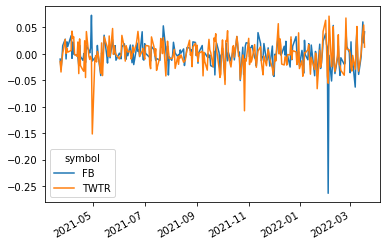

In [22]:
daily_returns_df.plot()

In [30]:
!conda info --envs

# conda environments:
#
                         C:\Users\trevg\anaconda3
base                  *  C:\Users\trevg\anaconda3\envs\alpacaenv
                         C:\Users\trevg\anaconda3\envs\dev



In [31]:
!conda activate alpacaenv

Could not find conda environment: alpacaenv
You can list all discoverable environments with `conda info --envs`.

